# Compare results notebook
- In this notebook we compare the results of training the ensemble model on different datasets.

### Load the metrics data for each run

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
runs = [3, 4, 5]
PATH = 'results'
PREFIX = 'RUN_'
stats = ['accuracy', 'precision', 'recall', 'f1']

def get_results(run):
    df = pd.read_csv(os.path.join(PATH, PREFIX + str(run), 'metrics.csv'))
    df['run'] = run

    for stat in stats:
        # Make numeric
        df[stat] = pd.to_numeric(df[stat], errors='coerce')

    return df

def get_results_all():
    return pd.concat([get_results(run) for run in runs])

In [30]:
df = get_results_all()

# Get data type of accuracy column
df['model'].dtype

dtype('O')

### Compare statistics
- Mean of every statsistic for every emotion combined. 
- Best emotional classification (F1 based)
- Worst emotional classification (F1 based)

In [20]:
df.keys()

Index(['model', 'accuracy', 'f1', 'recall', 'precision', 'run'], dtype='object')

In [34]:
stats = ['accuracy', 'precision', 'recall', 'f1']
print(df.groupby(['run']).mean())


     accuracy        f1    recall  precision
run                                         
3    0.541553  0.523511  0.541553   0.535529
4    0.556685  0.545705  0.556786   0.548942
5    0.545281  0.536635  0.545281   0.543803


/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_82014/703316170.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['run']).mean())


### Plot the results
- Barplot of different scores for each dataset

In [40]:
import seaborn as sns

sns.set(style="whitegrid")

/var/folders/ws/k1b01gtx6w3cxl_xhlxl_6vm0000gn/T/ipykernel_82014/994086991.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['run']).mean()[stats].plot(kind='bar', ax=ax, legend=False)


[Text(0, 0, 'Normal'), Text(1, 0, 'Augmented'), Text(2, 0, 'Balanced')]

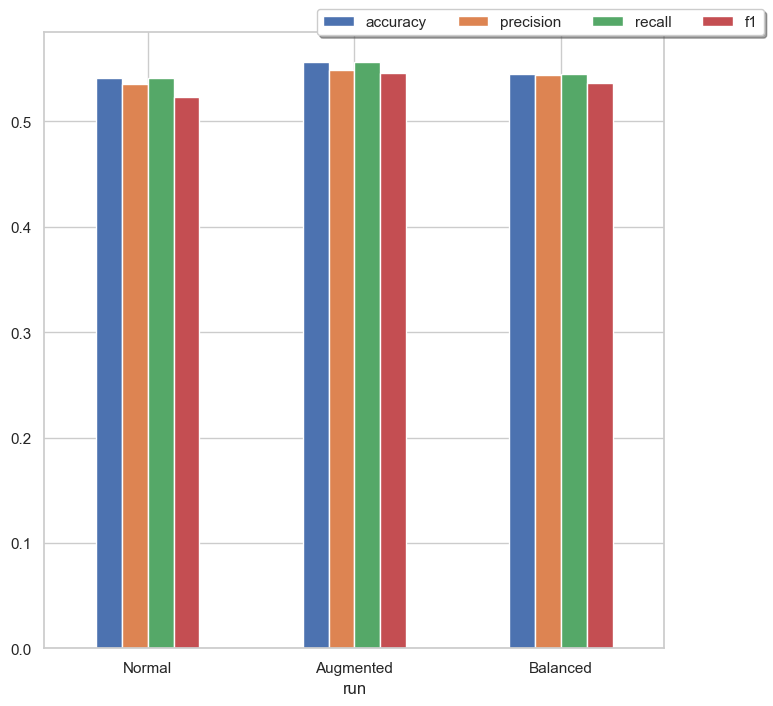

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# barplot, place legend lower right
df.groupby(['run']).mean()[stats].plot(kind='bar', ax=ax, legend=False)

ax.legend(loc='upper center', bbox_to_anchor=(0.8, 1.05),
          ncol=4, fancybox=True, shadow=True)

# Set the x labels to be ['Normal', 'Balanced', 'Augmented']
ax.set_xticklabels(['Normal', 'Augmented', 'Balanced'], rotation=0)

<AxesSubplot: xlabel='model'>

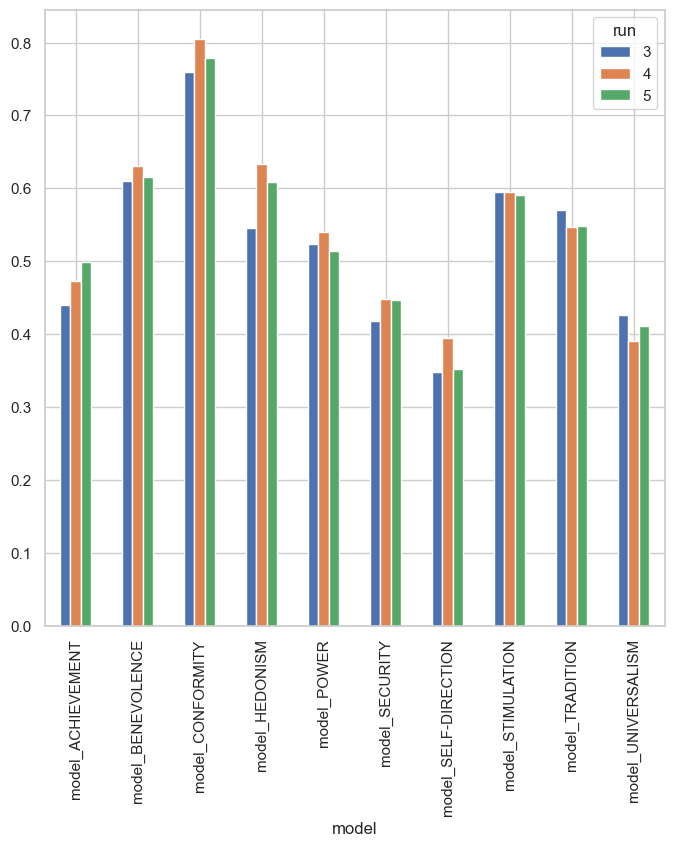

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

df.groupby(['model', 'run'])['f1'].mean().unstack().plot(kind='bar', ax=ax)

### Conclusion
The models perform better when trained with the augmented dataset compared to the other two. However the performance improvement is only slight, and is does not seem to be related to any specific values.